<a href="https://colab.research.google.com/github/Dominik-vinish/Naan-Mudhalvan-project-submission/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning

)

In [ ]:
#!pip install -U imbalanced-learn --upgrade

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder,StandardScaler,MaxAbsScaler,Normalizer
from sklearn.model_selection import cross_val_score, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')
df.head(200)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,55,0,2,135,250,0,2,161,0,1.4,2,0,3,Absence
196,196,58,0,4,100,248,0,2,122,0,1.0,2,0,3,Absence
197,197,54,0,3,110,214,0,0,158,0,1.6,2,0,3,Absence
198,198,69,0,1,140,239,0,0,151,0,1.8,1,2,3,Absence


In [ ]:
df.shape
df.isna().sum()
df.isnull().sum()
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,270.0,134.500000,78.086491,0.0,67.25,134.5,201.75,269.0
Age,270.0,54.433333,9.109067,29.0,48.00,55.0,61.00,77.0
Sex,270.0,0.677778,0.468195,0.0,0.00,1.0,1.00,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.00,3.0,4.00,4.0
BP,270.0,131.344444,17.861608,94.0,120.00,130.0,140.00,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.00,245.0,280.00,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.00,0.0,0.00,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.00,2.0,2.00,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.00,153.5,166.00,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.00,0.0,1.00,1.0


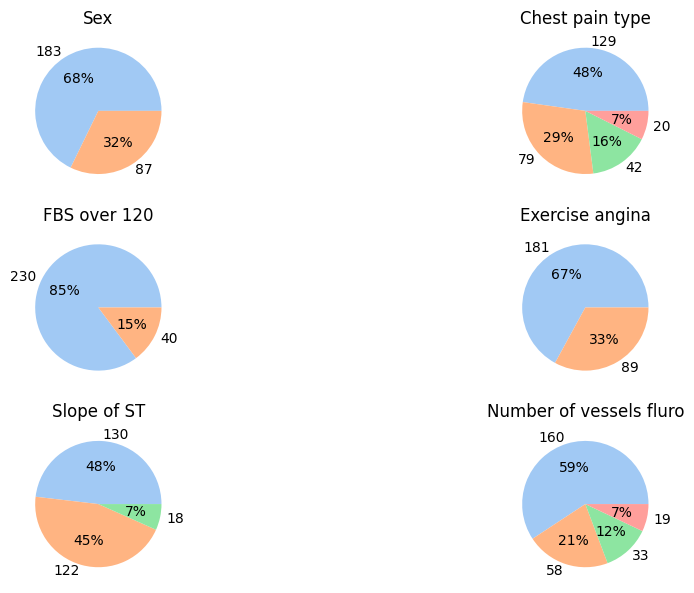

In [ ]:

cat_cols = ['Sex','Chest pain type','FBS over 120','Exercise angina','Slope of ST','Number of vessels fluro']
fig, ax = plt.subplots(nrows=3,ncols=2,figsize =(10,8))
j = 0
k = 0
for i,col in enumerate(cat_cols):
    if i == 0:
        j = 0
        k = 0
    elif i%2 == 0:
        j = j + 1
        k = 0
    else:
        k = k + 1
    ax = plt.subplot2grid((4,2),(j,k))
    fig.tight_layout()
    plt.title(col)
    plt.pie(x=df[col].value_counts(),labels=df[col].value_counts().values,colors=sns.color_palette('pastel'),
           autopct='%.0f%%')

<Axes: >

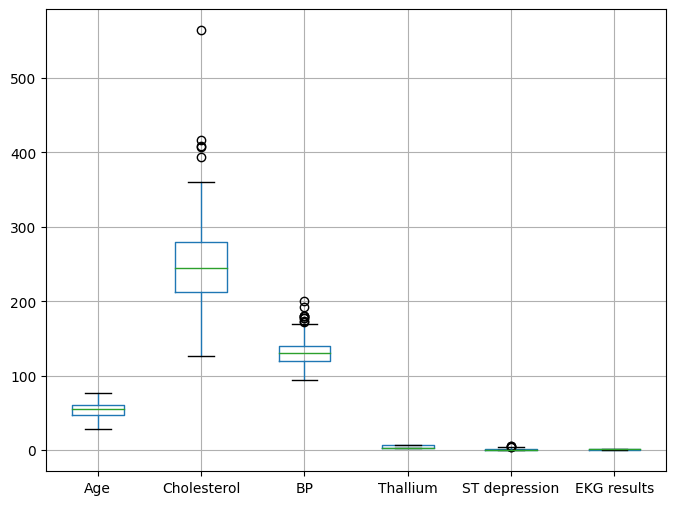

In [ ]:
fig = plt.figure(figsize=(8,6))
df.boxplot(column=skewed_cols)

In [ ]:
outlier_cols = ['Cholesterol', 'BP', 'ST depression']
for i,col in enumerate(outlier_cols):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3  - q1
    lower_fence = q1 - 1.5 * (iqr)
    upper_fence = q3 + 1.5 * (iqr)
    lower_fence_cnt = df[(df[col]< lower_fence)][col].count()
    upper_fence_cnt = df[(df[col]> upper_fence)][col].count()
    print(f"The Lower fence  {lower_fence} and upper fence {upper_fence}")
    print(f"The total outliers in {col} = {lower_fence_cnt},{upper_fence_cnt}")

The Lower fence  112.5 and upper fence 380.5
The total outliers in Cholesterol = 0,5
The Lower fence  90.0 and upper fence 170.0
The total outliers in BP = 0,9
The Lower fence  -2.4000000000000004 and upper fence 4.0
The total outliers in ST depression = 0,4


In [ ]:
for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3  - q1
    lower_fence = q1 - 1.5 * (iqr)
    upper_fence = q3 + 1.5 * (iqr)
    ind = df[ (df[col]< lower_fence) | (df[col]> upper_fence)] [col].index
    for i in ind:
        age = df['Age'].iloc[i]
        ch_mode = df[df['Age']== age] [col].mode()
        if ch_mode.count() == 1:
            df[col].iloc[i] = ch_mode
            #print( df[col].iloc[i])
        else:
            df[col].iloc[i] = df[df['Age']== age] [col].median()
            #print( df[col].iloc[i])

<Axes: >

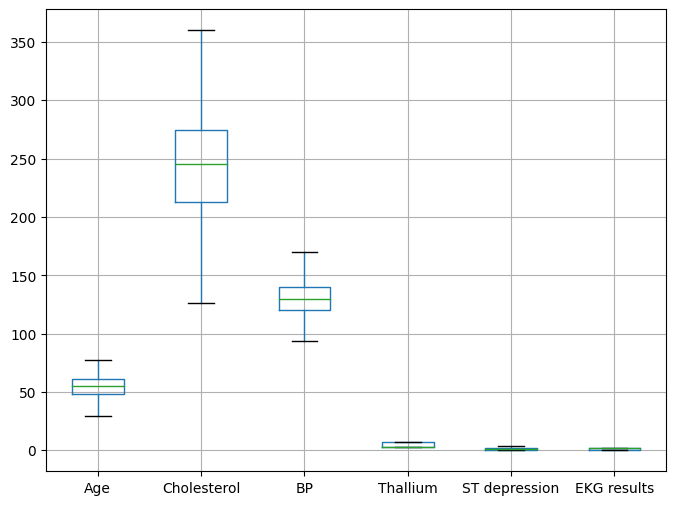

In [ ]:
fig = plt.figure(figsize=(8,6))
df.boxplot(column=skewed_cols)

In [ ]:
label = LabelEncoder()
df['Heart Disease_encoded'] = label.fit_transform(df['Heart Disease'])

In [ ]:
### Checking Correlation

<Axes: >

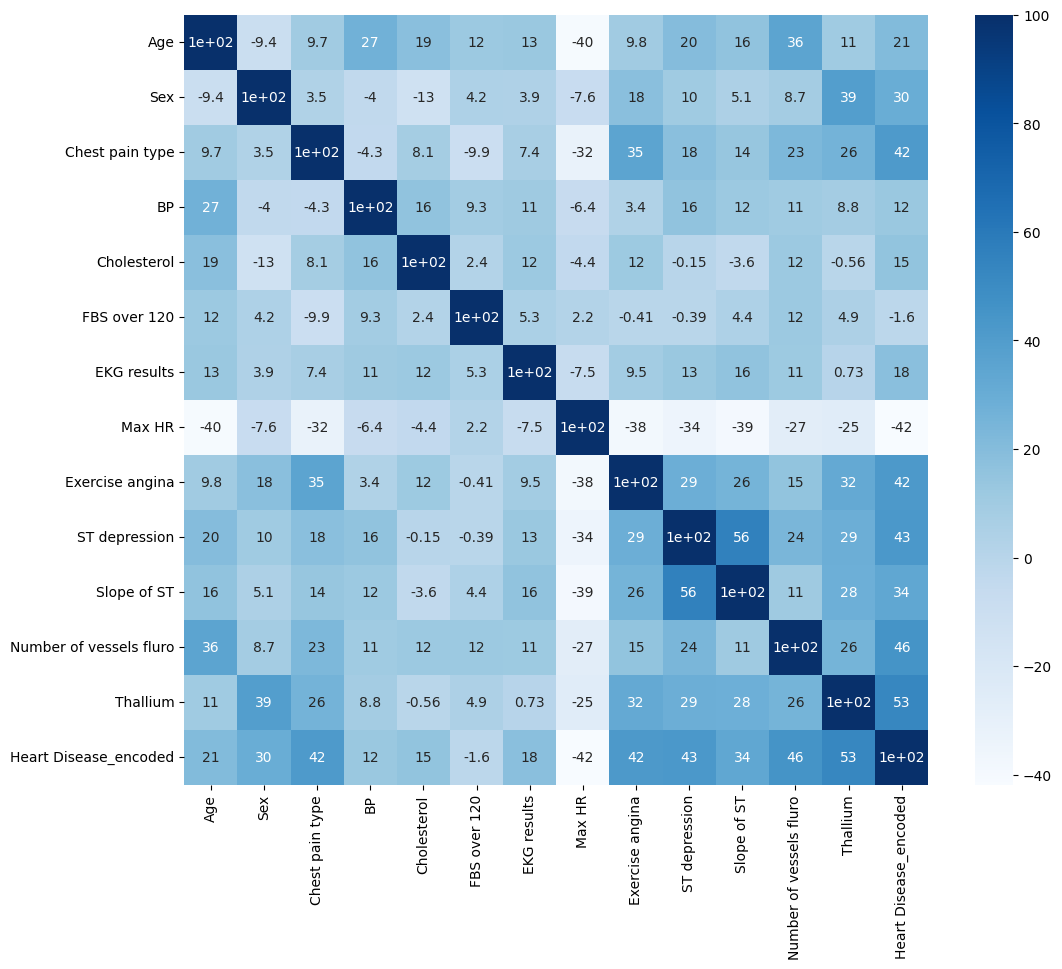

In [ ]:
numeric_col = [ 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
        'Heart Disease_encoded']
plt.figure(figsize=(12,10))
sns.heatmap(data= df[numeric_col].corr()*100,annot=True,cmap='Blues')

In [ ]:
df.columns
vif_cols = [ 'Sex','Chest pain type','BP',  'Cholesterol', 'Age','Thallium', 'Slope of ST',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression',  'Number of vessels fluro']

In [ ]:
df_model = df.copy(True)
df_model['Heart Disease_encoded'] = df['Heart Disease_encoded']
vif_df = pd.DataFrame()
vif_df['Features'] = vif_cols
vif_df['VIF Values'] = 7
for i in range(len(vif_cols)):
    vif_df['VIF Values'].iloc[i]= vif(df_model[vif_cols].values,i)
    vif_data =  vif_df['VIF Values'].iloc[i]
max_vif = 10
while max_vif > 6:
    for i,col in enumerate(vif_df.values):
        if col[1] > 5:
           if  vif_df['VIF Values'][i] > max_vif:
                    max_vif = vif_df['VIF Values'][i]
                    max_feature = vif_df['Features'][i]
                    print(max_vif,max_feature)
                    df_model.drop(max_feature,axis=1,inplace=True)
                    vif_df.drop(index=i,axis=0,inplace=True)
                    max_vif = 0
print('All features which exbhited multicollinearity has been removed')

13.912746227227645 Chest pain type
71.20933672633399 BP
34.40819579463471 Cholesterol
42.237025185213035 Age
10.149566980258932 Thallium
11.56919132195858 Slope of ST
34.51060055871611 Max HR
All features which exbhited multicollinearity has been removed


([<matplotlib.patches.Wedge at 0x7c770ed5dea0>,
 [Text(-0.1910130855889933, 1.083288512416601, '150'),
  Text(0.19101318701378264, -1.0832884945326604, '120')],
 [Text(-0.10418895577581451, 0.5908846431363277, '56%'),
  Text(0.10418901109842689, -0.5908846333814511, '44%')])

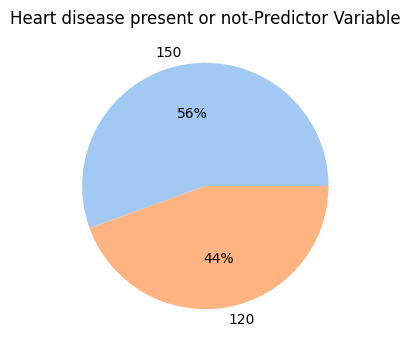

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Heart disease present or not-Predictor Variable')
plt.pie(x=df['Heart Disease_encoded'].value_counts(),labels=df['Heart Disease_encoded'].value_counts().values,
        colors=sns.color_palette('pastel')
        ,autopct='%.0f%%')

In [ ]:
df_model.columns

Index(['index', 'Sex', 'FBS over 120', 'EKG results', 'Exercise angina',
       'ST depression', 'Number of vessels fluro', 'Heart Disease',
       'Heart Disease_encoded'],
      dtype='object')

In [ ]:
X_col = [ 'Sex','Chest pain type','BP',  'Cholesterol', 'Age','Thallium', 'Slope of ST',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression',  'Number of vessels fluro']
X = df[X_col]
y = df['Heart Disease_encoded']

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
lrg_model = LogisticRegression()
lrg_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lrg_model.predict(X_test)

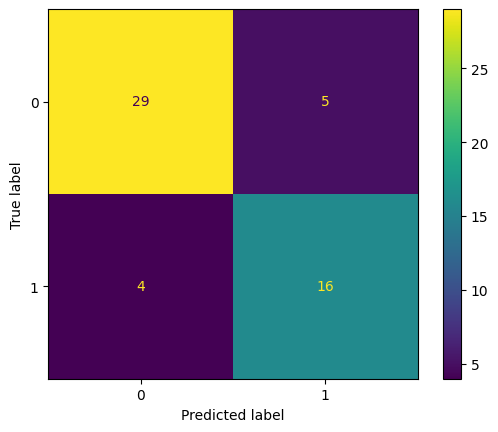

In [ ]:
c_mat = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(c_mat,display_labels=lrg_model.classes_)
display.plot()

In [ ]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.76      0.80      0.78        20

    accuracy                           0.83        54
   macro avg       0.82      0.83      0.82        54
weighted avg       0.84      0.83      0.83        54

